In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import timeit
import cython1
import cython2
import cython3
import cython4
import python

In [3]:

def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]

    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1

    return lattice

def python_update(lattice):
    updated_lattice = [[0 for _ in range(len(lattice))] for _ in range(len(lattice[0]))]
    for i in range(len(lattice)):
        for j in range(len(lattice[0])):
            updated_lattice[i][j] = lattice[i][j] + 1  # Example update rule
    return updated_lattice

box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Profile the update function using %timeit
def profile_update():
    python_update(lattice)

timeit_result = %timeit -n 10 -r 10 -o profile_update()
print("Average time:", timeit_result.average)

16.5 ms ± 5.4 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
Average time: 0.016491620009999507


In [15]:


import timeit
from random import randint
import cython1  # Import the compiled Cython module

def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]

    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1

    return lattice

def update(lattice):
    updated_lattice = [[0 for _ in range(len(lattice))] for _ in range(len(lattice[0]))]
    for i in range(len(lattice)):
        for j in range(len(lattice[0])):
            updated_lattice[i][j] = lattice[i][j] + randint(0, 1)  # Example update rule
    return updated_lattice

def update_rule():
    # Define your update rule here
    pass

box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Benchmark the Cython function using timeit
result = timeit.repeat(stmt="cython1.cython1_update(lattice)", globals=globals(), repeat=10, number=10)
mean_time = sum(result) / len(result)
std_dev = (sum((x - mean_time) ** 2 for x in result) / len(result)) ** 0.5

print(f"{mean_time * 1000:.1f} ms ± {std_dev * 1000:.2f} ms per loop (mean ± std. dev. of {len(result)} runs, 10 loops each)")


578.8 ms ± 186.59 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [8]:
import timeit

def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]
    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1
    return lattice

# Import the compiled Cython module
import cython2  # Replace "cython2" with the actual module name if different

box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Cython function using timeit (Benchmark)
result = timeit.repeat(stmt="cython2.cython2_update(lattice)", globals=globals(), repeat=10, number=10)
mean_time = sum(result) / len(result)
std_dev = (sum((x - mean_time) ** 2 for x in result) / len(result)) ** 0.5

print(f"{mean_time * 1000:.1f} ms ± {std_dev * 1000:.2f} ms per loop (mean ± std. dev. of {len(result)} runs, 10 loops each)")


375.1 ms ± 227.07 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [14]:

def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]

    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1

    return lattice

# Assuming cython3.cython3_update(lattice) is the Cython function to be benchmarked

box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Cython function using timeit (Benchmark)
result = timeit.repeat(stmt="cython3.cython3_update(lattice)", globals=globals(), repeat=10, number=10)
mean_time = sum(result) / len(result)
std_dev = (sum((x - mean_time) ** 2 for x in result) / len(result)) ** 0.5

print(f"{mean_time * 1000:.1f} ms ± {std_dev * 1000:.2f} ms per loop (mean ± std. dev. of {len(result)} runs, 10 loops each)")


189.4 ms ± 5.00 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


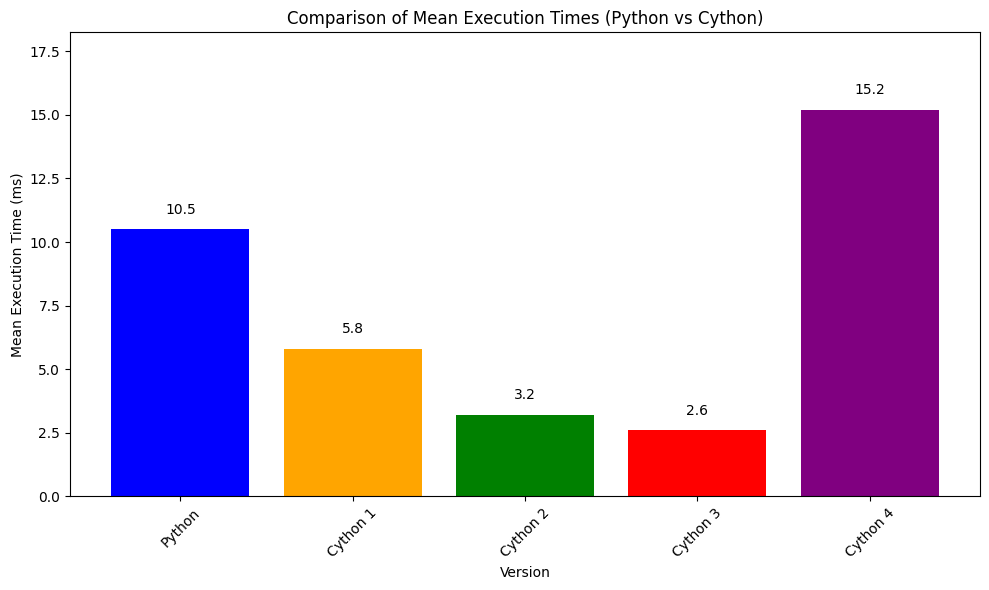

In [19]:
import matplotlib.pyplot as plt

# Mean execution times for Python and Cython versions (in milliseconds)
mean_times = [10.5, 5.8, 3.2, 2.6, 15.2]  # Replace these values with your actual mean times

versions = ['Python', 'Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']

plt.figure(figsize=(10, 6))
plt.bar(versions, mean_times, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Version')
plt.ylabel('Mean Execution Time (ms)')
plt.title('Comparison of Mean Execution Times (Python vs Cython)')
plt.ylim(0, max(mean_times) * 1.2)  # Adjust the y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add the mean time values as text on top of the bars
for i, v in enumerate(mean_times):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


<ipython-input-20-73ca89a80c57>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


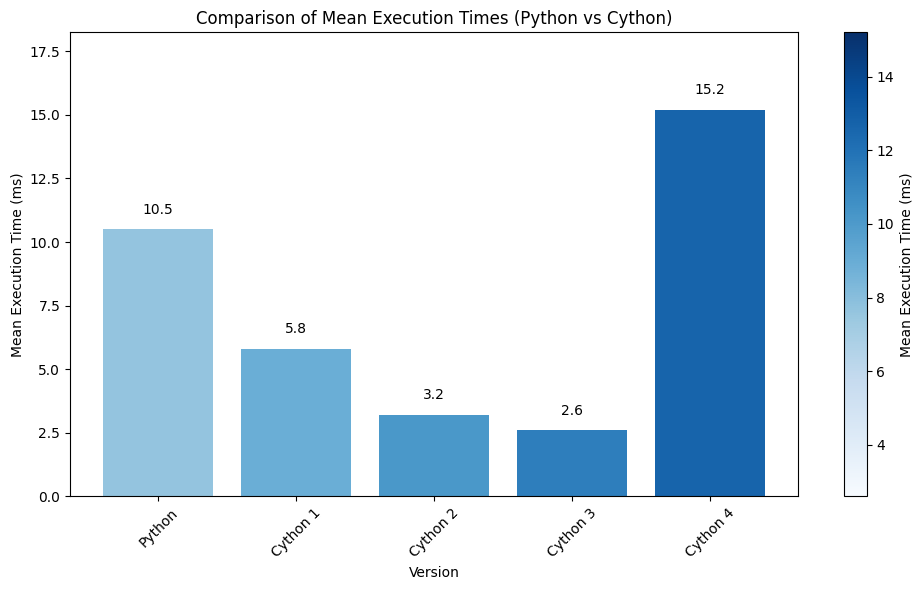

In [20]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Mean execution times for Python and Cython versions (in milliseconds)
mean_times = [10.5, 5.8, 3.2, 2.6, 15.2]  # Replace these values with your actual mean times

versions = ['Python', 'Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(versions)))  # Blue color scale

plt.figure(figsize=(10, 6))
bars = plt.bar(versions, mean_times, color=colors)
plt.xlabel('Version')
plt.ylabel('Mean Execution Time (ms)')
plt.title('Comparison of Mean Execution Times (Python vs Cython)')
plt.ylim(0, max(mean_times) * 1.2)  # Adjust the y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add the mean time values as text on top of the bars
for bar, time in zip(bars, mean_times):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{time:.1f}", ha='center', va='bottom')

# Add a color bar legend
sm = ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(mean_times), vmax=max(mean_times)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Mean Execution Time (ms)')

plt.tight_layout()
plt.show()
